# Mid-semester assignment Part 2 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please copy it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1: Sivan Zagdon 213002918
<br>
Student 2: Shir Zohar 323856542

## Sign Language Digits With PyTorch
Sign Language Digits dataset contains 5,000 grayscale images in 10 categories. The images show individual articles of hand sign at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://www.researchgate.net/publication/344389112/figure/fig8/AS:941467451260937@1601474740275/Sample-images-from-ASL-with-digits-dataset.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>





The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of numbers ranging from '0' to '9'. These correspond to the *class* of hand sign digit the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Hand Sign Zero</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Hand Sign One</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Hand Sign Two</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Hand Sign Three</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Hand Sign Four</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Hand Sign Five</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Hand Sign Six</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Hand Sign Seven</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Hand Sign Eight</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Hand Sign Nine</td>
  </tr>
</table>

<br>

# Goodluck!

# Neural Network with PyTorch part 1 (Binary Classification)

## Import Libraries

In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

## Dwonload Dataset

In [2]:
%%capture
!pip install ipython-autotime
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq
%load_ext autotime

time: 482 µs (started: 2025-01-22 12:50:39 +00:00)


Loading the dataset as NumPy arrays:

* The `dataset` file is a NumPy array containing the image pixles. As you can see, it includes 5,000 rows for each image and 784 columns for each pixel in the image (28x28).
* The `labels` file is a NumPy array containing the images labels. As you can see, it includes 5,000 rows for each image corresponding to the dataset.

In [3]:
loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 46.8 ms (started: 2025-01-22 12:50:42 +00:00)


The code displays the 1000th image from the dataset, reshaped to 28x28 pixels, using `matplotlib`.

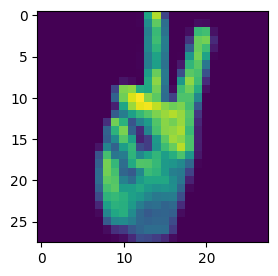

time: 366 ms (started: 2025-01-22 12:50:44 +00:00)


In [4]:
plt.figure(figsize=(3, 3))
plt.imshow(X[1000].reshape(28,28))
plt.show()

## Data preprocessing
There is no obligation to use the "hints" I left here for the benefit of the pre-processing stage. If you have another way that is more convenient for this step, then you are welcome to use it.

### Feature scaling

If this is to normalize the features (characteristics) to the range [0, 1] so that it can be better learned to be influenced by high values.

In [5]:
examples = y.shape[0]
y1 = y.reshape(1, examples)
X1 = X / 255
X1 = X1.T
print(X1.shape)

(784, 5000)
time: 32.8 ms (started: 2025-01-22 12:50:46 +00:00)


### Select two classes

This code filters the dataset to select two classes (`4` and `5`) for a binary classification task. It uses `np.isin` to extract relevant images (`X_selected`) and converts labels to binary format (`y_binary`) with `np.where`, assigning `1` to class `5` and `0` to class `4`. The shapes of the filtered data and labels are printed for validation.

In [6]:
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Class counts:", class_counts)

selected_classes = [4, 5]
mask = np.isin(y.astype(int), selected_classes)
X_selected = X1[:, mask]
y_selected = y[mask].astype(int)
y_binary = np.where(y_selected == selected_classes[1], 1, 0)

print(f"Selected classes shape: {X_selected.shape}")
print(f"Binary labels shape: {y_binary.shape}")


Class counts: {'0': 500, '1': 500, '2': 500, '3': 500, '4': 500, '5': 500, '6': 500, '7': 500, '8': 500, '9': 500}
Selected classes shape: (784, 1000)
Binary labels shape: (1000,)
time: 23.7 ms (started: 2025-01-22 12:50:48 +00:00)


Use Pytorch data tools to preprocessed the row data<br>
Read about pytorch data tools here: https://pytorch.org/docs/stable/data.html


This code defines a custom PyTorch Dataset class (CustomHandSignDataset) to handle hand sign data for binary classification. The dataset class initializes the features and labels as tensors, applies PyTorch-specific formatting, and enables indexed access through the __getitem__ method. A DataLoader with random sampling is then created to efficiently manage batches of size 32. The code verifies the DataLoader by printing the shape of the first batch to ensure correct data preprocessing and batching. This structure prepares the data for training a neural network.

In [7]:
from torch.utils.data import Dataset, DataLoader, RandomSampler


class CustomHandSignDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32).T
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]


dataset = CustomHandSignDataset(X_selected, y_binary)


batch_size = 32
sampler = RandomSampler(dataset)
dataloader = DataLoader(dataset, batch_size=batch_size, sampler=sampler)


for batch_idx, (X_batch, y_batch) in enumerate(dataloader):
    print(f"Batch {batch_idx + 1}:")
    print(f"Features shape: {X_batch.shape}, Labels shape: {y_batch.shape}")
    break


Batch 1:
Features shape: torch.Size([32, 784]), Labels shape: torch.Size([32])
time: 13.1 ms (started: 2025-01-22 12:50:50 +00:00)


### Build the network layers
Read about Fully connected layers in pytorch here: https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

This code defines a fully connected neural network for binary classification using PyTorch. The network has three layers:

Input Layer (fc1): Maps 784 input features (28x28 pixels) to 128 nodes.
Hidden Layer (fc2): Reduces 128 nodes to 64.
Output Layer (fc3): Outputs a single value for binary classification (0 or 1).
The forward method applies ReLU activation to the first two layers and Sigmoid activation to the output layer. This structure prepares the network for training and ensures compatibility with binary classification tasks.

In [8]:
from torch import nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x



time: 12.8 ms (started: 2025-01-22 12:50:53 +00:00)


This code determines the hardware device (CPU or GPU) to use for training or inference based on availability. The NeuralNetwork model is instantiated and moved to the selected device using .to(device). The model architecture is then printed, showing the details of each layer, including input and output features, and bias settings. This ensures that the model is ready for computation on the optimal hardware.

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = NeuralNetwork().to(device)

print(model)


NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)
time: 439 ms (started: 2025-01-22 12:50:55 +00:00)


### Build the Optimizer
Read about the Optimizer here: https://pytorch.org/docs/stable/optim.html

This code sets up the Adam optimizer to adjust the model's parameters during training. A learning rate of 0.0001 is defined to control the step size for updates. The model.parameters() method ensures the optimizer is linked to the model's weights. The configuration is printed to validate the optimizer's details.

In [10]:
from torch import optim

learning_rate = 0.0001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(optimizer)


Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
time: 2.67 s (started: 2025-01-22 12:50:57 +00:00)


### Loss Function
Read about Loss here: https://pytorch.org/docs/stable/optim.html

This code defines the Binary Cross Entropy Loss (BCELoss), which is well-suited for binary classification tasks. It computes the difference between the predicted probabilities and the actual binary labels to measure how well the model's predictions align with the true labels.

In [11]:
import torch.nn as nn

loss = nn.BCELoss()
print(loss)


BCELoss()
time: 568 µs (started: 2025-01-22 12:51:00 +00:00)


### Training
Train your model, Don't forget to store the "loss" and "Accuracy" while training, you will have to show them later.<br>
Read about Loss here: https://pytorch.org/tutorials/beginner/introyt/trainingyt.html

This code implements the training process for the neural network over 20 epochs. For each epoch, it computes the loss for each batch, updates the weights using the Adam optimizer, and tracks the accuracy by comparing the model's predictions with the true labels. The total loss and accuracy for each epoch are stored in eval_losses and eval_accu for further evaluation. The training ensures efficient weight updates and prepares the model for binary classification tasks.

In [12]:
number_of_epochs = 20

eval_losses = []
eval_accu = []


for epoch in range(number_of_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        predictions = model(X_batch).squeeze()

        batch_loss = loss(predictions, y_batch.float())

        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

        running_loss += batch_loss.item()
        predicted_labels = (predictions > 0.5).int()
        correct_predictions += (predicted_labels == y_batch).sum().item()
        total_predictions += y_batch.size(0)

    epoch_loss = running_loss / len(dataloader)
    epoch_accuracy = correct_predictions / total_predictions

    eval_losses.append(epoch_loss)
    eval_accu.append(epoch_accuracy)


    print(f"Epoch {epoch + 1}/{number_of_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")


Epoch 1/20, Loss: 0.6700, Accuracy: 0.8710
Epoch 2/20, Loss: 0.6105, Accuracy: 0.9630
Epoch 3/20, Loss: 0.5034, Accuracy: 0.9620
Epoch 4/20, Loss: 0.3658, Accuracy: 0.9680
Epoch 5/20, Loss: 0.2504, Accuracy: 0.9690
Epoch 6/20, Loss: 0.1795, Accuracy: 0.9730
Epoch 7/20, Loss: 0.1309, Accuracy: 0.9780
Epoch 8/20, Loss: 0.1036, Accuracy: 0.9810
Epoch 9/20, Loss: 0.0863, Accuracy: 0.9800
Epoch 10/20, Loss: 0.0755, Accuracy: 0.9810
Epoch 11/20, Loss: 0.0664, Accuracy: 0.9820
Epoch 12/20, Loss: 0.0596, Accuracy: 0.9820
Epoch 13/20, Loss: 0.0557, Accuracy: 0.9830
Epoch 14/20, Loss: 0.0495, Accuracy: 0.9830
Epoch 15/20, Loss: 0.0459, Accuracy: 0.9840
Epoch 16/20, Loss: 0.0446, Accuracy: 0.9830
Epoch 17/20, Loss: 0.0392, Accuracy: 0.9860
Epoch 18/20, Loss: 0.0353, Accuracy: 0.9860
Epoch 19/20, Loss: 0.0332, Accuracy: 0.9870
Epoch 20/20, Loss: 0.0305, Accuracy: 0.9880
time: 2.86 s (started: 2025-01-22 12:51:03 +00:00)


### Loss and Accuracy Visualization
Show  on plot the lose during training

This code visualizes the training process by plotting two graphs:

Training Loss Over Epochs: Shows the decrease in loss as the model learns during training.
Training Accuracy Over Epochs: Illustrates the improvement in accuracy across epochs.
The graphs use the matplotlib library, with proper labels, titles, and legends to enhance clarity.  

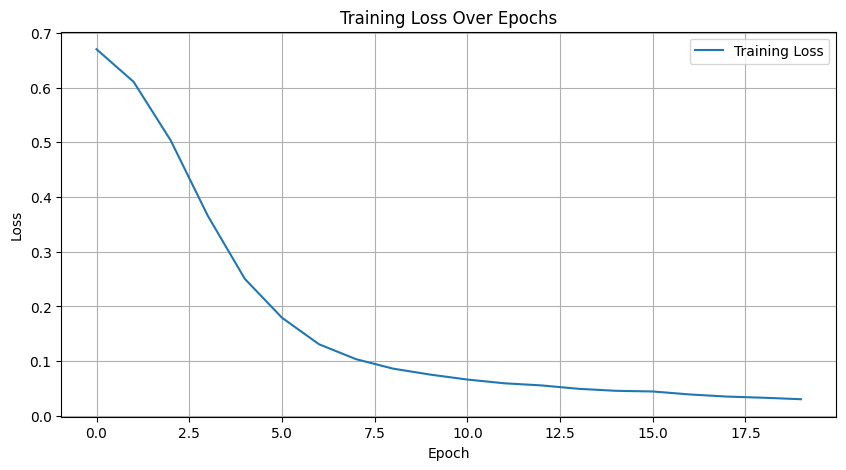

time: 190 ms (started: 2025-01-22 12:51:08 +00:00)


In [13]:

plt.figure(figsize=(10, 5))
plt.plot(eval_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()


Show  on plot the accuracy during training

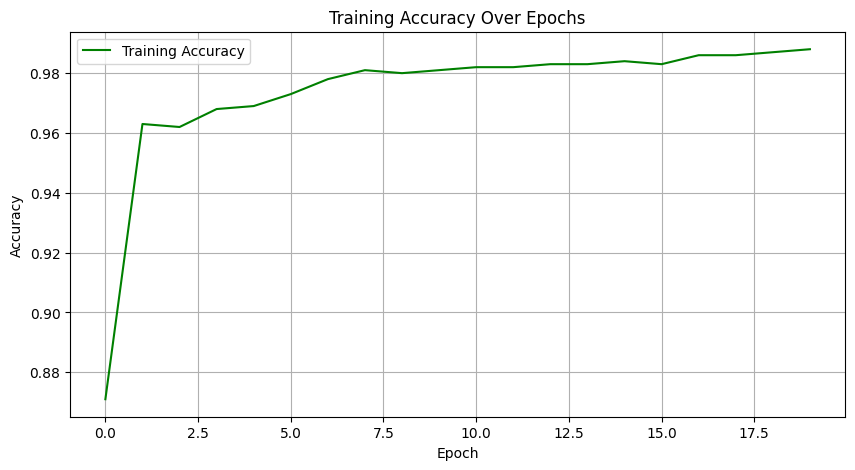

time: 171 ms (started: 2025-01-22 12:51:12 +00:00)


In [14]:
plt.figure(figsize=(10, 5))
plt.plot(eval_accu, label='Training Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.grid()
plt.show()


### Test
Test your model (Show accuracy by comparing the prediction VS the test label)

This code tests the trained model using the test dataset. It splits the data into training and testing sets using train_test_split, converts the test set to PyTorch tensors, and moves them to the selected device (CPU/GPU). The model is evaluated in eval() mode, and predictions are generated using the test data. The binary predictions are computed using a threshold of 0.5. Finally, the test accuracy is calculated using accuracy_score from sklearn and printed for review.

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X_selected.T, y_binary, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

model.eval()

with torch.no_grad():
    y_pred = model(X_test_tensor).squeeze()

    y_pred_binary = (y_pred > 0.5).int()

    test_accuracy = accuracy_score(y_test_tensor.cpu(), y_pred_binary.cpu())
    print(f"Test Accuracy: {test_accuracy:.4f}")

Training data shape: (800, 784), Training labels shape: (800,)
Test data shape: (200, 784), Test labels shape: (200,)
Test Accuracy: 0.9850
time: 95.3 ms (started: 2025-01-22 12:51:15 +00:00)


### Model Evaluation
Show the model evaluation by presenting the confusion metrix in a representative way<br>
Read about confusion metrix visualization here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


This code evaluates the model's performance using a confusion matrix. The matrix is calculated with confusion_matrix from sklearn, comparing the true labels with the predicted labels. It is visualized as a heatmap using seaborn, with clear labels for "True Labels" and "Predicted Labels." The confusion matrix provides insights into the model's performance, showing the number of correct and incorrect predictions for each class.

Confusion Matrix:
[[ 95   1]
 [  2 102]]


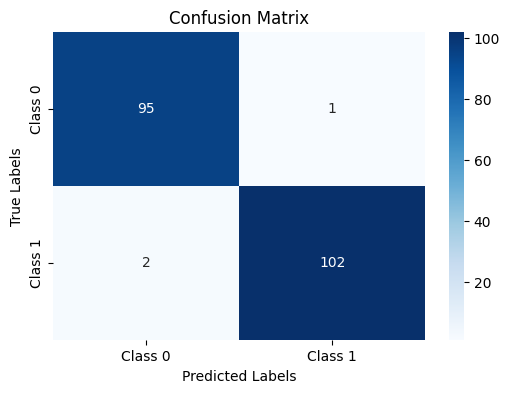

time: 342 ms (started: 2025-01-22 12:51:17 +00:00)


In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

confusion = confusion_matrix(y_test_tensor.cpu(), y_pred_binary.cpu())
print("Confusion Matrix:")
print(confusion)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()



---
<br>


# Neural Network with PyTorch part 2 (Multiclass Classification)

## Import Libraries

In [17]:
%%capture
!pip install ipython-autotime
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
%load_ext autotime

time: 1.91 s (started: 2025-01-22 12:51:20 +00:00)


## Load Dataset

In [18]:
loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 45.9 ms (started: 2025-01-22 12:51:23 +00:00)


### The rest you will have to create yourself...

## Models

### Base Model

This code defines a basic neural network (Base Model) for multiclass classification, serving as a foundational architecture for further experimentation and improvements. The model consists of three fully connected layers.

The Base Model serves as the initial step in building a neural network for multiclass classification. It uses three fully connected layers with ReLU activation functions for the first two layers. The model's simplicity allows us to establish a baseline for performance and serves as a reference point for future enhancements. Key parameters, such as the number of neurons in each layer and the overall structure, were selected to ensure a straightforward yet effective design. This enables us to evaluate the impact of modifications like adding complexity or tuning hyperparameters. The results and insights derived from the Base Model are critical for guiding improvements in subsequent experiments.

In [20]:

class BaseModel(nn.Module):
    def __init__(self):
        super(BaseModel, self).__init__()

        self.fc1 = nn.Linear(784, 128)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout1(x)
        x = nn.functional.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return nn.functional.log_softmax(x, dim=1)


base_model = BaseModel()
print(base_model)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model = base_model.to(device)


BaseModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
time: 8.82 ms (started: 2025-01-22 12:51:39 +00:00)


Epoch 1/10, Loss: 18.8578
Epoch 2/10, Loss: 11.0951
Epoch 3/10, Loss: 9.2678
Epoch 4/10, Loss: 7.6695
Epoch 5/10, Loss: 6.2041
Epoch 6/10, Loss: 5.0479
Epoch 7/10, Loss: 4.3003
Epoch 8/10, Loss: 3.7187
Epoch 9/10, Loss: 3.3522
Epoch 10/10, Loss: 2.9963
Model Accuracy: 0.45


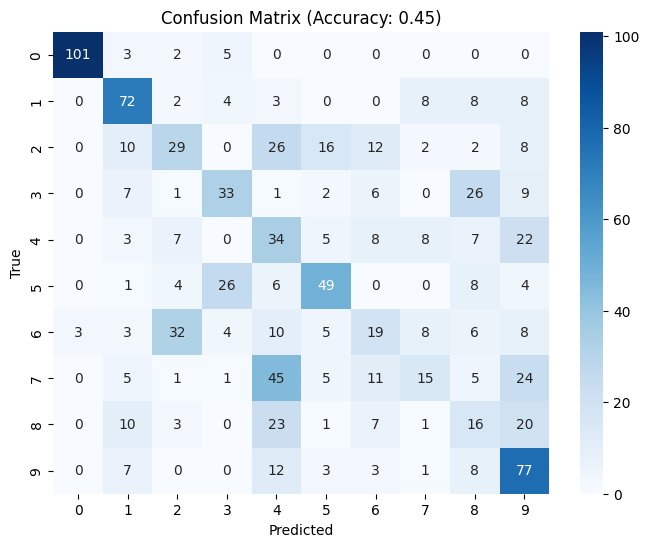

time: 1.19 s (started: 2025-01-22 12:54:14 +00:00)


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

X = X.astype(np.float32)
y = y.astype(np.int64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

optimizer = torch.optim.Adam(base_model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

num_epochs = 10

for epoch in range(num_epochs):
    base_model.train()
    optimizer.zero_grad()
    outputs = base_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

base_model.eval()
with torch.no_grad():
    outputs = base_model(X_test_tensor)
    predictions = torch.argmax(outputs, dim=1)

y_test_np = y_test_tensor.cpu().numpy()
predictions_np = predictions.cpu().numpy()

conf_matrix = confusion_matrix(y_test_np, predictions_np)
accuracy = accuracy_score(y_test_np, predictions_np)
print(f"Model Accuracy: {accuracy:.2f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test_np), yticklabels=np.unique(y_test_np))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.show()


### Experiment number 1

In [24]:
loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f"Dataset shape: {X.shape}\nLabels shape: {y.shape}")


Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 45.6 ms (started: 2025-01-22 12:54:19 +00:00)


This code splits the dataset into training and validation sets using an 80-20 split ratio. It then converts the training and validation data and labels into PyTorch tensors with the appropriate data types (`float32` for data and `long` for labels). Finally, it prints the shapes of the resulting tensors to confirm the successful splitting and conversion, ensuring the training set contains 4000 samples and the validation set contains 1000 samples.

In [25]:
y = y.astype(int)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

print(f"Train data shape: {X_train_tensor.shape}, Train labels shape: {y_train_tensor.shape}")
print(f"Validation data shape: {X_val_tensor.shape}, Validation labels shape: {y_val_tensor.shape}")

Train data shape: torch.Size([4000, 784]), Train labels shape: torch.Size([4000])
Validation data shape: torch.Size([1000, 784]), Validation labels shape: torch.Size([1000])
time: 18 ms (started: 2025-01-22 12:54:22 +00:00)


This code defines and trains `ExperimentModel1`, a neural network with four fully connected layers for multi-class classification. The model uses `CrossEntropyLoss` for calculating loss and the Adam optimizer with a learning rate of `0.001` for efficient weight updates. Key variables (`train_losses`, `val_losses`, `train_accuracies`, `val_accuracies`) track training and validation performance. The training loop performs forward and backward passes, updates weights, and evaluates validation accuracy. Metrics like `Train Loss`, `Val Loss`, `Train Acc`, and `Val Acc` provide insights into the model's learning and generalization over 50 epochs.

In [26]:

class ExperimentModel1(nn.Module):
    def __init__(self):
        super(ExperimentModel1, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.relu(self.fc3(x))
        x = self.fc4(x)
        return x


model = ExperimentModel1()
print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    train_losses.append(loss.item())

    loss.backward()
    optimizer.step()

    _, predicted = torch.max(outputs, 1)
    train_accuracy = accuracy_score(y_train_tensor.numpy(), predicted.detach().numpy())
    train_accuracies.append(train_accuracy)

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

        _, val_predicted = torch.max(val_outputs, 1)
        val_accuracy = accuracy_score(y_val_tensor.numpy(), val_predicted.numpy())
        val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")


ExperimentModel1(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)
Epoch [1/50], Train Loss: 4.7025, Val Loss: 10.3638, Train Acc: 0.1062, Val Acc: 0.1070
Epoch [2/50], Train Loss: 10.2188, Val Loss: 7.0366, Train Acc: 0.0988, Val Acc: 0.1140
Epoch [3/50], Train Loss: 6.7540, Val Loss: 4.5675, Train Acc: 0.1415, Val Acc: 0.1370
Epoch [4/50], Train Loss: 4.5535, Val Loss: 3.3230, Train Acc: 0.1310, Val Acc: 0.2170
Epoch [5/50], Train Loss: 3.3709, Val Loss: 3.3869, Train Acc: 0.2055, Val Acc: 0.2270
Epoch [6/50], Train Loss: 3.3966, Val Loss: 3.0851, Train Acc: 0.2188, Val Acc: 0.2310
Epoch [7/50], Train Loss: 3.0969, Val Loss: 2.4924, Train Acc: 0.2303, Val Acc: 0.2910
Epoch [8/50], Train Loss: 2.4762, Val Loss: 2.1568, Train Acc: 0.2807, Val Acc: 0.2550
Epoch [9/50], Train Loss: 2.1212, V

The code provides a comprehensive evaluation of the model's performance by visualizing training and validation accuracy and loss trends, helping identify issues like overfitting or underfitting. The confusion matrix and classification report offer a detailed breakdown of the model's performance across all classes, showing precision, recall, and F1-scores. These evaluations are crucial for understanding the model's strengths and weaknesses, ensuring it generalizes well, and guiding further optimization steps for improved accuracy and robustness.

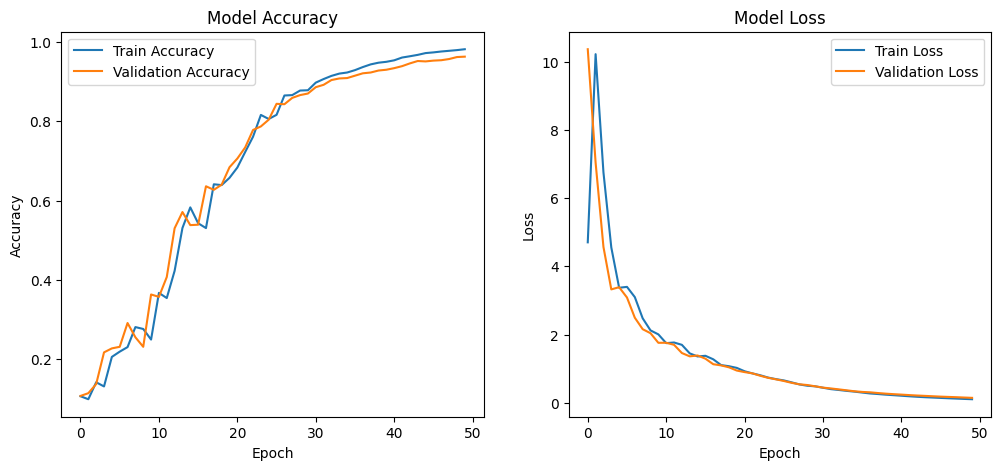

Confusion Matrix:
 [[111   0   0   0   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   2   1]
 [  0   0 100   0   0   2   3   0   0   0]
 [  0   0   0  78   2   0   0   0   1   4]
 [  0   0   0   0  91   0   2   1   0   0]
 [  0   0   0   2   3  93   0   0   0   0]
 [  0   0   0   0   3   1  93   1   0   0]
 [  0   0   0   1   2   0   2 106   1   0]
 [  0   0   0   0   1   0   0   2  78   0]
 [  0   0   0   0   0   0   0   0   0 111]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      0.97      0.99       105
           2       1.00      0.95      0.98       105
           3       0.96      0.92      0.94        85
           4       0.89      0.97      0.93        94
           5       0.97      0.95      0.96        98
           6       0.93      0.95      0.94        98
           7       0.96      0.95      0.95       112
           8       0.95      0.96     

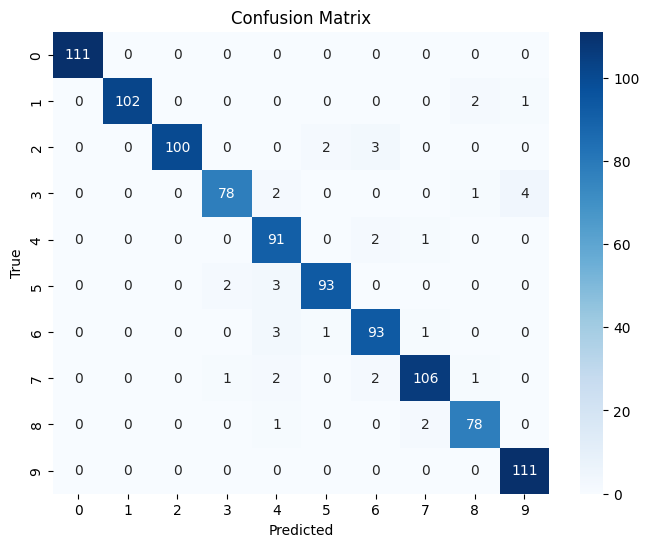

time: 609 ms (started: 2025-01-22 12:54:33 +00:00)


In [27]:
from sklearn.metrics import classification_report, confusion_matrix

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

model.eval()
with torch.no_grad():
    val_outputs = model(X_val_tensor)
    _, val_predicted = torch.max(val_outputs, 1)


conf_matrix = confusion_matrix(y_val, val_predicted.numpy())
class_report = classification_report(y_val, val_predicted.numpy())

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### Experiment number 2

This code prepares the data and parameters for Experiment 2, focusing on testing the effects of modified hyperparameters. The learning rate is set to **0.01**, batch size to **64**, and the model will train for **30 epochs**. The data is split into training and validation sets in an 80:20 ratio using `train_test_split`. The data is converted into PyTorch Tensors and organized into `TensorDataset` objects. Finally, `DataLoaders` are created for both datasets, with shuffling enabled for the training set to ensure randomized batches during training. This setup enables efficient data handling and evaluation for the experiment.

In [28]:
learning_rate = 0.01
batch_size = 64
num_epochs = 30

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


time: 16.7 ms (started: 2025-01-22 12:54:38 +00:00)


The `ExperimentModel2` is designed to test the impact of a simplified architecture and dropout regularization on performance. The model consists of four fully connected layers with a decreasing number of neurons: 784, 256, 128, 64, and 10. A **Dropout layer** with a probability of 0.3 is added after the second layer to reduce overfitting by randomly deactivating neurons during training. The activation function used is **ReLU** for non-linear transformations, and the output layer does not apply an activation function, as **CrossEntropyLoss** is used for multiclass classification. The optimizer is set to **SGD** to evaluate how gradient descent with momentum performs compared to other methods. The model is transferred to the appropriate device (CPU/GPU) to prepare for training. This configuration aims to analyze the trade-offs between architectural complexity and generalization.

In [29]:
class ExperimentModel2(nn.Module):
    def __init__(self):
        super(ExperimentModel2, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.dropout(x)
        x = nn.functional.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = ExperimentModel2()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

time: 12.5 ms (started: 2025-01-22 12:54:41 +00:00)


The provided `train` function is a comprehensive training loop designed for evaluating the performance of the `ExperimentModel2` using training and validation data. The function iterates through a specified number of epochs (`num_epochs`), where in each epoch, the model is trained and evaluated. During the training phase, the model updates its parameters using backpropagation and the optimizer, while computing the total loss and accuracy for the training set. In the validation phase, the model's performance is assessed without gradient updates to track generalization. The function records the losses and accuracies for both training and validation datasets, printing these metrics at the end of each epoch for monitoring the model's progress over time. This ensures consistent evaluation and allows insights into overfitting or underfitting.

In [30]:
def train(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        train_loss, correct_train = 0, 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * X_batch.size(0)
            correct_train += (outputs.argmax(1) == y_batch).sum().item()

        train_losses.append(train_loss / len(train_loader.dataset))
        train_accuracies.append(correct_train / len(train_loader.dataset))

        model.eval()
        val_loss, correct_val = 0, 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)
                correct_val += (outputs.argmax(1) == y_batch).sum().item()

        val_losses.append(val_loss / len(val_loader.dataset))
        val_accuracies.append(correct_val / len(val_loader.dataset))

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.4f}")

train(model, train_loader, val_loader, criterion, optimizer, num_epochs)


Epoch 1/30, Train Loss: 2.1925, Train Accuracy: 0.3307, Val Loss: 2.1151, Val Accuracy: 0.2710
Epoch 2/30, Train Loss: 1.1022, Train Accuracy: 0.6075, Val Loss: 1.4336, Val Accuracy: 0.5170
Epoch 3/30, Train Loss: 0.7175, Train Accuracy: 0.7492, Val Loss: 0.5612, Val Accuracy: 0.8320
Epoch 4/30, Train Loss: 0.5792, Train Accuracy: 0.7995, Val Loss: 0.7160, Val Accuracy: 0.7720
Epoch 5/30, Train Loss: 0.3131, Train Accuracy: 0.9038, Val Loss: 0.3805, Val Accuracy: 0.8400
Epoch 6/30, Train Loss: 0.2087, Train Accuracy: 0.9303, Val Loss: 0.2652, Val Accuracy: 0.9230
Epoch 7/30, Train Loss: 0.2338, Train Accuracy: 0.9275, Val Loss: 0.3059, Val Accuracy: 0.9120
Epoch 8/30, Train Loss: 0.1141, Train Accuracy: 0.9645, Val Loss: 0.0748, Val Accuracy: 0.9750
Epoch 9/30, Train Loss: 0.0730, Train Accuracy: 0.9790, Val Loss: 0.2547, Val Accuracy: 0.9060
Epoch 10/30, Train Loss: 0.0671, Train Accuracy: 0.9798, Val Loss: 0.0551, Val Accuracy: 0.9820
Epoch 11/30, Train Loss: 0.0427, Train Accuracy: 

This code visualizes the training process by plotting the accuracy and loss metrics over the epochs for both the training and validation datasets. The first subplot shows the accuracy progression, comparing training and validation accuracy, while the second subplot displays the loss evolution for both datasets. These plots help assess the model's learning behavior, monitor convergence, and identify issues like overfitting or underfitting.

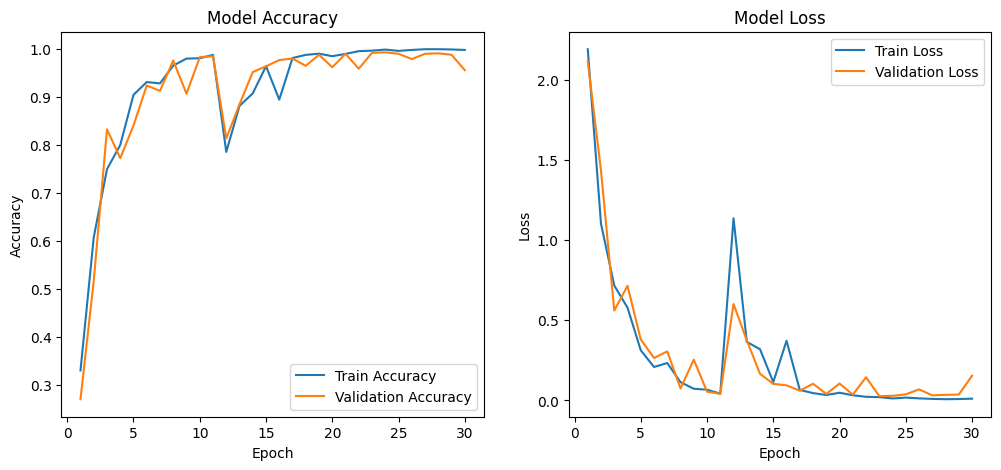

time: 441 ms (started: 2025-01-22 12:54:53 +00:00)


In [31]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_accuracies, label="Train Accuracy")
plt.plot(range(1, num_epochs+1), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs+1), val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()

This code evaluates the trained model on the validation dataset by generating predictions and comparing them to the true labels. It calculates the confusion matrix to visualize the model's classification performance for each class and displays it as a heatmap. Additionally, it provides a classification report with precision, recall, F1-score, and support for each class. These metrics help assess the model's overall performance and identify areas where it may need improvement.

Confusion Matrix:
[[111   0   0   0   0   0   0   0   0   0]
 [  0 104   1   0   0   0   0   0   0   0]
 [  0   0 105   0   0   0   0   0   0   0]
 [  0   0   1  80   0   0   0   4   0   0]
 [  0   0   0   0  90   0   0   3   1   0]
 [  0   0   0   2   3  88   4   1   0   0]
 [  0   0   1   0   0   0  97   0   0   0]
 [  0   0   0   0   0   0   0 112   0   0]
 [  0   0   0   0   0   0   0  18  63   0]
 [  0   2   1   0   0   0   0   1   2 105]]


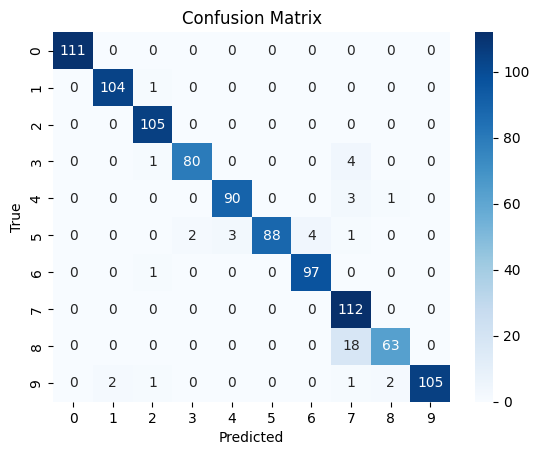

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       0.98      0.99      0.99       105
           2       0.96      1.00      0.98       105
           3       0.98      0.94      0.96        85
           4       0.97      0.96      0.96        94
           5       1.00      0.90      0.95        98
           6       0.96      0.99      0.97        98
           7       0.81      1.00      0.89       112
           8       0.95      0.78      0.86        81
           9       1.00      0.95      0.97       111

    accuracy                           0.95      1000
   macro avg       0.96      0.95      0.95      1000
weighted avg       0.96      0.95      0.96      1000

time: 351 ms (started: 2025-01-22 12:54:57 +00:00)


In [32]:
from sklearn.metrics import classification_report
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(outputs.argmax(1).cpu().numpy())

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_true, y_pred))


### Save Trained model (your best model)
Read about Save and load models in pytorch here: [https://pytorch.org/tutorials/beginner/saving_loading_models.html](https://pytorch.org/tutorials/beginner/saving_loading_models.html)



This code saves the model's state dictionary to a file named `'best_model.pth'`, allowing the model to be reloaded later without retraining.

In [33]:

torch.save(model.state_dict(), 'best_model.pth')

print("Model saved successfully!")


Model saved successfully!
time: 6.95 ms (started: 2025-01-22 12:55:01 +00:00)


## Test Environment (of part 2 only)
This part is meant to show the tester how your model is performing. Keep in mind that the only cells he is going to run are the cells below.<br>
(If there are libraries that need to be used please add their import. If there is a process that the data has to go through before it enters the model, don't forget to add it as well).

### Load trained model


This code sets up a testing environment for the trained model by reloading its state dictionary (best_model.pth). It ensures the model is correctly mapped to the available device (CPU or GPU), handles errors gracefully during loading, and displays the model's architecture and saved weights for verification. This process confirms the readiness of the model for evaluation.

In [34]:

class ExperimentModel1(nn.Module):
    def __init__(self):
        super(ExperimentModel1, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.dropout = nn.Dropout(0.3)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.dropout(x)
        x = nn.functional.relu(self.fc3(x))
        x = self.fc4(x)
        return x


model = ExperimentModel1()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

try:
    model.load_state_dict(torch.load('best_model.pth', map_location=device))
    model.eval()
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")

print("Model Architecture:")
print(model)


print("Loaded Model Weights:")
print(model.state_dict().keys())


Model loaded successfully!
Model Architecture:
ExperimentModel1(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
Loaded Model Weights:
odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])
time: 17.7 ms (started: 2025-01-22 12:55:04 +00:00)


<ipython-input-34-e157a3068867>:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth', map_location=device))


### Single prediction
Let the tester examine your trained model on single predicttion test.<br>You will use the colab.file library to allow the tester to upload a single npy file of an Sign Language Digit (28x28 image as npy).<br>
Then build a function that takes this image, loads the weights of the trained model (If you haven't loaded it before), show the image and prints a prediction.


This code implements a pipeline to process an input image or .npy file, load a trained neural network model, and predict the class of the input data. The process_image function handles the preprocessing of the input by reshaping, normalizing, and displaying the image. The load_model function defines a neural network architecture, loads the pre-trained weights from a file (best_model.pth), and prepares the model for inference. The predict function takes the preprocessed input tensor, passes it through the model, and returns the predicted label with its probabilities. The main function ties everything together, allowing the user to upload a file, process it, and obtain a classification result. This implementation is modular and ensures that the model can be reused and tested on new data efficiently.

Saving 3_example.npy to 3_example (1).npy
Loaded .npy file successfully!
Reshaped array to (28, 28) for image processing.
Input Image/Array Shape: (28, 28)


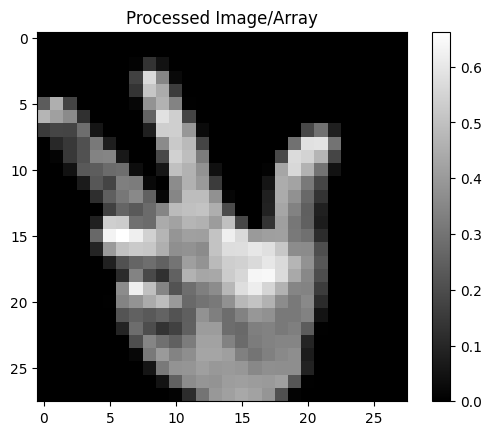

Input Tensor Shape: torch.Size([1, 784])
Model Architecture:
ExperimentModel1(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
Model Weights Loaded Successfully!
Model Output (Logits): [[-0.20393956 -0.12692346  0.06227987  0.14892268  0.0059376   0.0062652
  -0.11062452 -0.12806693 -0.00449331  0.09617307]]
Model Output (Probabilities): [[0.08317361 0.08983245 0.10854335 0.11836728 0.10259686 0.10263047
  0.09130862 0.08972979 0.10153224 0.11228527]]
Predicted Label: 3
time: 10.1 s (started: 2025-01-22 12:55:09 +00:00)


<ipython-input-35-ff41bd6a22c4>:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth', map_location=device))


In [35]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image


def process_image(file_name):
    try:
        if file_name.endswith(".npy"):
            input_array = np.load(file_name)
            print("Loaded .npy file successfully!")

            if input_array.shape == (784,):
                input_array = input_array.reshape((28, 28))
                print("Reshaped array to (28, 28) for image processing.")
        else:
            input_image = Image.open(file_name).convert("L").resize((28, 28))
            input_array = np.array(input_image)

        input_array = input_array / 255.0


        print("Input Image/Array Shape:", input_array.shape)
        plt.imshow(input_array, cmap="gray")
        plt.title("Processed Image/Array")
        plt.colorbar()
        plt.show()

        return input_array
    except Exception as e:
        print(f"Error processing image: {e}")
        return None


def load_model(device):
    class ExperimentModel1(torch.nn.Module):
        def __init__(self):
            super(ExperimentModel1, self).__init__()
            self.fc1 = torch.nn.Linear(784, 256)
            self.fc2 = torch.nn.Linear(256, 128)
            self.dropout = torch.nn.Dropout(0.3)
            self.fc3 = torch.nn.Linear(128, 64)
            self.fc4 = torch.nn.Linear(64, 10)

        def forward(self, x):
            x = torch.nn.functional.relu(self.fc1(x))
            x = torch.nn.functional.relu(self.fc2(x))
            x = self.dropout(x)
            x = torch.nn.functional.relu(self.fc3(x))
            x = self.fc4(x)
            return x

    model = ExperimentModel1().to(device)
    print("Model Architecture:")
    print(model)

    try:
        model.load_state_dict(torch.load('best_model.pth', map_location=device))
        model.eval()
        print("Model Weights Loaded Successfully!")
    except Exception as e:
        print(f"Error Loading Model Weights: {e}")

    return model


def predict(model, input_tensor):
    """Makes a prediction with the loaded model."""
    with torch.no_grad():
        output = model(input_tensor)
        probabilities = torch.nn.functional.softmax(output, dim=1).cpu().numpy()

        print("Model Output (Logits):", output.cpu().numpy())
        print("Model Output (Probabilities):", probabilities)
        predicted_label = torch.argmax(output, dim=1).item()

    return predicted_label


def main():
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]

    input_array = process_image(file_name)
    if input_array is None:
        print("Image/Array processing failed. Exiting...")
        return

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    input_tensor = torch.tensor(input_array, dtype=torch.float32).view(1, -1).to(device)

    print("Input Tensor Shape:", input_tensor.shape)

    model = load_model(device)

    predicted_label = predict(model, input_tensor)
    print(f"Predicted Label: {predicted_label}")



main()
